In [58]:
# Download cifar10 dataset

from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


In [59]:
# Importing libaries
import numpy as np
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [ ]:
# Print shapes of cifar10 datasets
print('train data shape:', x_train.shape)
print('train labels shape:', y_train.shape)
print('')
print('test data shape:', x_test.shape)
print('test labels shape', y_test.shape)

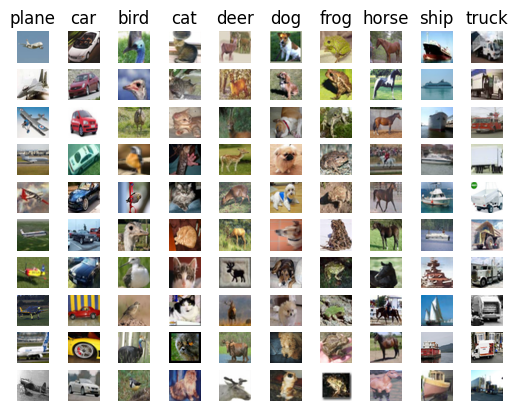

In [61]:
# Show images belong to cifar10
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 10
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(x_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()


In [62]:
# Convert images to vector format

x_train = x_train.reshape(-1, 3072)
x_test = x_test.reshape(-1, 3072)

In [ ]:
print('reshaped train data:', x_train.shape)
print('reshaped test data:', x_test.shape)


In [90]:
# Special similarity function

def custom_similarity(A, B):
   # Calculate cosine similarity

    dot_product = np.dot(A, B)
    norm_A = np.linalg.norm(A)
    norm_B = np.linalg.norm(B)
    return dot_product / (norm_A * norm_B)

# KNN special similarity function

def knnCustomSimilarity(x_train, y_train, sample_test, k):
    distances = []
    for i in range(len(x_train)):
        distance = custom_similarity(sample_test, x_train[i])
        distances.append((distance, y_train[i][0]))

# Sort by distance in descending order

    distances.sort(key=lambda x: x[0], reverse=True)

    nearest_neighbors = distances[:k]

    class_counts = {}
    for distance, label in nearest_neighbors:
        class_counts[label] = class_counts.get(label, 0) + 1

    most_frequent_class = max(class_counts, key=class_counts.get)
    return most_frequent_class

# Select a random sample from the test set

random_index = random.randint(0, x_test.shape[0] - 1)
sample_test = x_test[random_index, :]

k = 5
similar_class_name = knnCustomSimilarity(x_train, y_train, sample_test, k)

# Print the most similar class of a randomly selected test sample

print("The most similar class for the randomly selected example:", classes[similar_class_name])

The most similar class for the randomly selected example: cat
